# SHAKEfetch — USGS Earthquake Data Inspection and Retrieval

This notebook demonstrates how to use the `SHAKEfetch` class to **inspect, select,
and retrieve earthquake products** from the USGS ComCat system.

`SHAKEfetch` is an **event-centric tool** designed to support research and
rapid-response workflows involving:

- time-evolving SHAKEmaps
- DYFI response updates
- source and rupture model evolution
- uncertainty-aware downstream analysis

Rather than assuming that products exist, the workflow emphasizes:
1. **inspection** (what ComCat declares as available)
2. **controlled fetching** (what you explicitly choose to download)

The examples below focus on a single earthquake event
(e.g. the **2024 Taiwan earthquake, Mw 7.4**), but the same workflow applies
to any USGS ComCat event ID.

---
`Last update: December 2025`  `SHAKEfetch version: 26.1`

---

## Prerequisites

Before running this notebook, ensure that you have:

- A Python environment with the required libraries:
  - `os`, `subprocess`, `logging`, `time`
  - `numpy`, `pandas`, `matplotlib`
- [`libcomcat`](https://code.usgs.gov/ghsc/esi/libcomcat-python) installed and
  accessible in your environment
- The USGS `getproduct` command-line utility available on your system
- A working Conda environment (e.g. `usgs-comcat.yml`)

For installation instructions, see the official  
[libcomcat Installation Guide](https://code.usgs.gov/ghsc/esi/libcomcat-python).

---

## About libcomcat

`libcomcat` is a Python interface to the ANSS ComCat earthquake catalog.
It provides programmatic access to:

- earthquake metadata
- declared product types and versions
- product content trees

`SHAKEfetch` builds on `libcomcat` by adding:
- structured inspection utilities
- version-aware downloads via `getproduct`
- reproducible, modular fetching strategies

---

## SHAKEfetch Design Philosophy (v26.1)

- **Single-event scoped**: one `SHAKEfetch` instance ↔ one event ID
- **Inspection first**: always verify availability before downloading
- **Version explicit**: all products support `"preferred"`, `"last"`,
  `"first"`, `"all"`, or explicit numeric versions
- **Modular fetching**: users declare *what* to fetch, *which version*,
  and *which files*

---

## Core Methods

### Initialization

- **`__init__(self, event_id='us7000m9g4')`**  
  Initializes the class with a USGS ComCat event ID and retrieves
  event metadata.

---

### Inspection (Read-Only)

- **`check_event_files(...)`**  
  Inspects the event in ComCat and logs:
  - which products exist
  - which versions are available
  - which files are declared for each product

  This method **does not download anything** and is intended for
  exploration and validation prior to fetching.

---

### Modular Downloading (Recommended)

- **`manual_fetcher(plan, ...)`**  
  A plan-driven downloader that allows fine-grained control over:
  - product on/off state
  - version selection (including explicit version numbers)
  - file subsets or entire product trees
  - dry-run previews for reproducibility

  This is the **preferred downloading interface** in v26.1.

---

### Legacy Convenience Download Methods

The following methods are retained for backward compatibility and
targeted workflows. Each downloads predefined file sets into
structured subdirectories under `export/SHAKEfetch/`.

- **`get_stations(version="all")`**  
  Station metadata (`stationlist.json`)

- **`get_ruptures(version="all")`**  
  Rupture models (`rupture.json`)

- **`get_attenuation_curves(version="all")`**  
  Attenuation curves (`attenuation_curves.json`)

- **`get_contours(version="all")`**  
  Contour products (e.g. `cont_mmi.json`, `cont_pga.json`)

- **`get_coverages(version="all")`**  
  Coverage grids (covjson format)

- **`get_event_info(version="all")`**  
  Event metadata (`info.json`)

- **`get_shapefiles(version="all")`**  
  Spatial products (`shakemap.kmz`, `shape.zip`)

- **`get_figures_all(version="all")`**  
  ShakeMap figures (intensity, PGA/PGV, legends)

- **`get_pagers(version="all")`**  
  LossPager products (PDF, XML, JSON)

---

### Source and Catalog Data

Returned as pandas DataFrames when available:

- **`get_origin()`**
- **`get_moment_tensor()`**
- **`get_finite_fault()`**
- **`get_phase_data()`**

(Some products may not exist for all events.)

---

### DYFI (Did-You-Feel-It?)

- **`get_dyfi()`**  
  Processes DYFI responses and returns a DataFrame containing:
  Version, source code, depth, latitude, longitude, max MMI,
  number of responses, update time, and elapsed time.

- **`plot_dyfi()`**  
  Visualizes DYFI response accumulation over time.

- **`get_dyfi_files(version="last")`**  
  Downloads a curated subset of DYFI files.

---

### Utilities

- **`print_doc()`**  
  Prints the full class docstring for reference.

---

## Version Parameter Summary

Most inspection and download methods accept a `version` argument:

- `"preferred"` — USGS authoritative version
- `"last"` — most recent update
- `"first"` — first published version
- `"all"` — all available versions
- `int` — explicit version number (e.g. `12`)

Note that inspection (via `libcomcat`) and downloading (via `getproduct`)
may expose versions differently. This behavior is expected and documented.

---


# Example 1 | Modular Standard Fetch
## 1.1 Single Event 

In [1]:
# ------------------------------------------------------------
# Import SHAKEfetch
# ------------------------------------------------------------
from modules.SHAKEfetch import *



# ------------------------------------------------------------
# 1. Define event
# ------------------------------------------------------------
# Example: 'us7000m9g4' M 7.4 - 15 km S of Hualien City, Taiwan
event_id = "us7000m9g4"

# Create SHAKEfetch instance
shakefetch = SHAKEfetch(event_id)





2025-12-18 17:15:53,502 - INFO - Searching for event ...
2025-12-18 17:15:55,790 - INFO - Retrieved Event Information:
2025-12-18 17:15:55,844 - INFO - Event Type: ACTUAL
2025-12-18 17:15:55,845 - INFO - Event Title: 15 km S of Hualien City, Taiwan
2025-12-18 17:15:55,845 - INFO - Event Magnitude: 7.4
2025-12-18 17:15:55,846 - INFO - Event Depth: 40
2025-12-18 17:15:55,846 - INFO - Event Latitude: 23.8356
2025-12-18 17:15:55,847 - INFO - Event Longitude: 121.5976
2025-12-18 17:15:55,848 - INFO - Event Event time: 2024-04-02T23:58:12.173Z
2025-12-18 17:15:55,849 - INFO - Includes "shakemap" as a product: True
2025-12-18 17:15:55,849 - INFO - [Pager] | Alert level: yellow
2025-12-18 17:15:55,850 - INFO - Max MMI (Pager): 8
2025-12-18 17:15:55,850 - INFO - Includes "station" as a property: False
2025-12-18 17:15:55,851 - INFO - [DYFI?] | Nrsp: 632
2025-12-18 17:15:55,852 - INFO - Max MMI (DYFI): 9.1


In [2]:
# ------------------------------------------------------------
# 2. Inspect available products and file contents
# ------------------------------------------------------------
# This prints:
#  - which products exist for the event
#  - the selected (preferred) version per product
#  - the available content names for that version
#
# IMPORTANT:
# This does NOT list all versions. It is a structural inspection
# tool, not a version enumerator.
print(shakefetch.check_event_files())


2025-12-18 17:15:57,819 - INFO - ===================================================
2025-12-18 17:15:57,820 - INFO - [check_event_files] Event ID: us7000m9g4
2025-12-18 17:15:57,820 - INFO - ===================================================
2025-12-18 17:15:57,821 - INFO - ---------------------------------------------------
2025-12-18 17:15:57,822 - INFO - [shakemap] Product available.
2025-12-18 17:15:57,825 - INFO - [shakemap] Version: 12 | Update time: 2024-06-05 21:01:04.531000
2025-12-18 17:15:57,826 - INFO - [shakemap]   Available contents:
2025-12-18 17:15:57,827 - INFO - [shakemap]     - contents.xml
2025-12-18 17:15:57,827 - INFO - [shakemap]     - download/attenuation_curves.json
2025-12-18 17:15:57,828 - INFO - [shakemap]     - download/cont_mi.json
2025-12-18 17:15:57,828 - INFO - [shakemap]     - download/cont_mmi.json
2025-12-18 17:15:57,829 - INFO - [shakemap]     - download/cont_pga.json
2025-12-18 17:15:57,829 - INFO - [shakemap]     - download/cont_pgv.json
2025-12

None


In [3]:
# ------------------------------------------------------------
# 3. Define a modular fetch plan
# ------------------------------------------------------------
# Each product entry controls:
#   - on/off: enable or disable downloading
#   - version: "preferred", "last", "first", "all", or an integer
#   - files:
#       * "__ALL__"            → all available contents
#       * specific filename   → single file
#       * list of filenames   → selected files
#
# Product names must match USGS ComCat product types.

plan = {
    # ShakeMap: fetch grid.xml for ALL versions (time evolution)
    "shakemap": {
        "on": True,
        "version": "all",
        "files": ["download/attenuation_curves.json","download/grid.xml","download/raster.zip","download/rupture.json","download/stationlist.json","download/uncertainty.xml"],
    },

    # DYFI: fetch latest community intensity products only
    "dyfi": {
        "on": True,
        "version": "last",
        "files": [
            "dyfi_zip.geojson",
            "cdi_geo.xml",
        ],
    },

    # PAGER: fetch all available files for the preferred version
    "losspager": {
        "on": True,
        "version": "preferred",
        "files": "__ALL__",
    },

    # Finite-fault: explicitly disabled (documented exclusion)
    "finite-fault": {
        "on": False,
    },
}

# ------------------------------------------------------------
# 4. Preview download (recommended)
# ------------------------------------------------------------
# dry_run=True prints what WOULD be downloaded without writing files.
# Always use this first when working with "all" versions.
shakefetch.modular_fetcher(
    plan,
    default_version="preferred",
    dry_run=True,
)

# ------------------------------------------------------------
# 5. Execute download
# ------------------------------------------------------------
# Writes files to disk using the existing SHAKEfetch download logic.
# Directory structure follows your v25 implementation.
shakefetch.modular_fetcher(
    plan,
    default_version="preferred",
    dry_run=False,
)


2025-12-18 17:16:17,393 - INFO - ===================================================
2025-12-18 17:16:17,394 - INFO - [modular_fetcher] Event: us7000m9g4
2025-12-18 17:16:17,394 - INFO - ===================================================
2025-12-18 17:16:17,395 - INFO - ---------------------------------------------------
2025-12-18 17:16:17,396 - INFO - [modular_fetcher] [shakemap] ON
2025-12-18 17:16:17,397 - INFO - [modular_fetcher] [shakemap] version=all, output_subdir=usgs-shakemap-versions
2025-12-18 17:16:17,397 - INFO - [modular_fetcher] [shakemap] files=6
2025-12-18 17:16:17,399 - INFO - [modular_fetcher] [shakemap]   - download/attenuation_curves.json
2025-12-18 17:16:17,399 - INFO - [modular_fetcher] [shakemap]   - download/grid.xml
2025-12-18 17:16:17,399 - INFO - [modular_fetcher] [shakemap]   - download/raster.zip
2025-12-18 17:16:17,400 - INFO - [modular_fetcher] [shakemap]   - download/rupture.json
2025-12-18 17:16:17,400 - INFO - [modular_fetcher] [shakemap]   - downlo

{'shakemap': {'attempted': True,
  'downloaded_count': 6,
  'requested_count': 6,
  'skipped_reason': None},
 'dyfi': {'attempted': True,
  'downloaded_count': 2,
  'requested_count': 2,
  'skipped_reason': None},
 'losspager': {'attempted': True,
  'downloaded_count': 25,
  'requested_count': 25,
  'skipped_reason': None},
 'finite-fault': {'attempted': False,
  'downloaded_count': 0,
  'requested_count': 0,
  'skipped_reason': 'off'}}

## Multiple Events 

In [ ]:
event_ids = [
    "us7000m9g4",
    "us7000pn9s",
    "us6000jllz",
]

plan = {
    "shakemap": {"on": True, "version": "all", "files": "download/grid.xml"},
    "dyfi": {"on": True, "version": "last", "files": "__ALL__"},
}

results = {}

for eid in event_ids:
    print(f"\n=== Processing event {eid} ===")
    sf = SHAKEfetch(eid)

    # Optional: inspect first
    sf.check_event_files(products=["shakemap", "dyfi"])

    # Fetch
    res = sf.modular_fetcher(plan, dry_run=False)
    results[eid] = res


# Example 2 | Plan-Based Fetch (declarative downloads)

Here are some example use cases for the `SHAKEfetch` class:

## Initialization and Fetching ShakeMap
```python
sf = SHAKEfetch('us7000m9g4') #example for Taiwan
sf.get_shakemap()


In [1]:
#Import SHAKEfetch Module 
from modules.SHAKEfetch import *

# Define the event ID for the earthquake
event_id = 'us7000m9g4' # Replace this with a valid event ID

# Create an instance of the SHAKEfetch class
shakefetch = SHAKEfetch("us7000m9g4")


2026-01-21 11:33:44,103 - INFO - Searching for event ...
2026-01-21 11:33:46,540 - INFO - Retrieved Event Information:
2026-01-21 11:33:46,608 - INFO - Event Type: ACTUAL
2026-01-21 11:33:46,608 - INFO - Event Title: 15 km S of Hualien City, Taiwan
2026-01-21 11:33:46,608 - INFO - Event Magnitude: 7.4
2026-01-21 11:33:46,624 - INFO - Event Depth: 40
2026-01-21 11:33:46,624 - INFO - Event Latitude: 23.8356
2026-01-21 11:33:46,625 - INFO - Event Longitude: 121.5976
2026-01-21 11:33:46,625 - INFO - Event Event time: 2024-04-02T23:58:12.173Z
2026-01-21 11:33:46,625 - INFO - Includes "shakemap" as a product: True
2026-01-21 11:33:46,625 - INFO - [Pager] | Alert level: yellow
2026-01-21 11:33:46,627 - INFO - Max MMI (Pager): 8
2026-01-21 11:33:46,627 - INFO - Includes "station" as a property: False
2026-01-21 11:33:46,627 - INFO - [DYFI?] | Nrsp: 632
2026-01-21 11:33:46,627 - INFO - Max MMI (DYFI): 9.1


In [2]:
print(shakefetch.check_shakemap_files())


2026-01-21 11:33:47,108 - INFO - Available content names in the ShakeMap product:
2026-01-21 11:33:47,108 - INFO -  - download/coverage_psa3p0_high_res.covjson
2026-01-21 11:33:47,109 - INFO -  - download/coverage_psa3p0_medium_res.covjson
2026-01-21 11:33:47,109 - INFO -  - download/coverage_pgv_high_res.covjson
2026-01-21 11:33:47,110 - INFO -  - download/mmi_legend.png
2026-01-21 11:33:47,111 - INFO -  - download/rupture.json
2026-01-21 11:33:47,112 - INFO -  - download/info.json
2026-01-21 11:33:47,113 - INFO -  - download/coverage_psa0p3_high_res.covjson
2026-01-21 11:33:47,113 - INFO -  - download/psa3p0.jpg
2026-01-21 11:33:47,115 - INFO -  - download/cont_psa0p3.json
2026-01-21 11:33:47,115 - INFO -  - download/coverage_pga_high_res.covjson
2026-01-21 11:33:47,115 - INFO -  - download/coverage_psa0p3_low_res.covjson
2026-01-21 11:33:47,115 - INFO -  - download/attenuation_curves.json
2026-01-21 11:33:47,116 - INFO -  - download/coverage_psa0p6_high_res.covjson
2026-01-21 11:33:

None


## Checking available files 

In [3]:
print(shakefetch.check_event_files())



2026-01-21 11:33:53,354 - INFO - ===================================================
2026-01-21 11:33:53,354 - INFO - [check_event_files] Event ID: us7000m9g4
2026-01-21 11:33:53,359 - INFO - ===================================================
2026-01-21 11:33:53,359 - INFO - ---------------------------------------------------
2026-01-21 11:33:53,359 - INFO - [shakemap] Product available.
2026-01-21 11:33:53,363 - INFO - [shakemap] Version: 12 | Update time: 2024-06-05 21:01:04.531000
2026-01-21 11:33:53,364 - INFO - [shakemap]   Available contents:
2026-01-21 11:33:53,365 - INFO - [shakemap]     - contents.xml
2026-01-21 11:33:53,366 - INFO - [shakemap]     - download/attenuation_curves.json
2026-01-21 11:33:53,366 - INFO - [shakemap]     - download/cont_mi.json
2026-01-21 11:33:53,366 - INFO - [shakemap]     - download/cont_mmi.json
2026-01-21 11:33:53,366 - INFO - [shakemap]     - download/cont_pga.json
2026-01-21 11:33:53,367 - INFO - [shakemap]     - download/cont_pgv.json
2026-01

None


## Event Information 

In [4]:
shakefetch.get_event_info()



2026-01-21 11:33:53,542 - INFO - [get_event_info] Starting event information download for event ID: us7000m9g4.
2026-01-21 11:33:53,544 - INFO - [shakemap] getproduct shakemap download/info.json -i us7000m9g4 --get-version=all
2026-01-21 11:34:05,173 - INFO - [get_event_info] Event info retrieval completed. Files saved: 1/1.


## Instruments Records 

In [5]:
shakefetch.get_stations()



2026-01-21 11:34:05,186 - INFO - [get_stations] Starting station data download for event ID: us7000m9g4.
2026-01-21 11:34:05,187 - INFO - [shakemap] getproduct shakemap download/stationlist.json -i us7000m9g4 --get-version=all
2026-01-21 11:34:24,487 - INFO - [get_stations] Station list retrieval completed. Files saved: 1/1.


## Fetching DYFI Data


In [6]:
dyfi_datafram = shakefetch.get_dyfi()
dyfi_datafram
#data.to_csv(f'./export/{event_id}_dyfi_timeinformation.csv', index=False)



2026-01-21 11:34:25,232 - WARNING - Could not convert 'num-responses' to int: cannot convert float NaN to integer


,Version,eventsourcecode,depth,latitude,longitude,maxmmi,num-responses,Update Time,Elapsed (sec)
0,1,24094050,11.40,23.8000,121.7000,8.2,10,2024-04-03 00:11:14.281,7.821080e+02
1,2,7000m9g4,34.75,23.8190,121.5616,8.2,14,2024-04-03 00:15:39.459,1.047286e+03
2,3,24094050,NaN,NaN,NaN,NaN,NaN,2024-04-03 00:15:57.963,1.065790e+03
3,4,00sbcakx,11.00,23.8000,121.7000,7.4,16,2024-04-03 00:17:34.905,1.162732e+03
4,5,24093050,11.40,23.8000,121.7000,4.1,3,2024-04-03 00:18:16.213,1.204040e+03
...,...,...,...,...,...,...,...,...,...
276,277,7000m9g4,40.00,23.8356,121.5976,9.1,628,2025-01-30 03:33:06.675,2.610569e+07
277,278,7000m9g4,40.00,23.8356,121.5976,9.1,629,2025-04-09 18:32:33.915,3.212126e+07
278,279,7000m9g4,40.00,23.8356,121.5976,9.1,630,2025-05-24 11:07:55.116,3.598258e+07
279,280,7000m9g4,40.00,23.8356,121.5976,9.1,631,2025-08-30 12:01:59.491,4.445303e+07


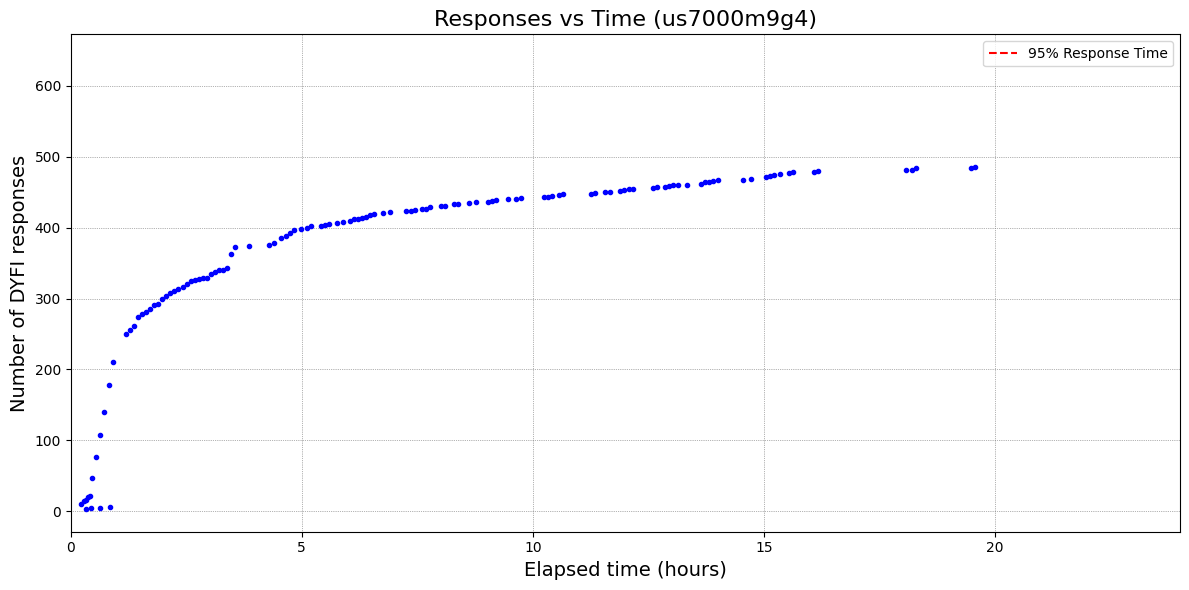

In [7]:
shakefetch.plot_dyfi()



In [8]:
shakefetch.get_dyfi_files(version="last")


2026-01-21 11:34:25,512 - INFO - [get_dyfi_files] Checking available DYFI product contents for event ID: us7000m9g4.
2026-01-21 11:34:25,513 - INFO - [get_dyfi_files] Available DYFI content: dyfi_zip.geojson
2026-01-21 11:34:25,513 - INFO - [get_dyfi_files] Available DYFI content: dyfi_geo_10km.geojson
2026-01-21 11:34:25,514 - INFO - [get_dyfi_files] Available DYFI content: dyfi_geo_1km.geojson
2026-01-21 11:34:25,515 - INFO - [get_dyfi_files] Available DYFI content: us7000m9g4_plot_numresp.txt
2026-01-21 11:34:25,515 - INFO - [get_dyfi_files] Available DYFI content: us7000m9g4_ciim_geo_imap.html
2026-01-21 11:34:25,515 - INFO - [get_dyfi_files] Available DYFI content: cdi_geo.txt
2026-01-21 11:34:25,515 - INFO - [get_dyfi_files] Available DYFI content: contents.xml
2026-01-21 11:34:25,515 - INFO - [get_dyfi_files] Available DYFI content: cdi_geo_1km.txt
2026-01-21 11:34:25,517 - INFO - [get_dyfi_files] Available DYFI content: dyfi_plot_atten.json
2026-01-21 11:34:25,517 - INFO - [get

## Rupture Information

In [9]:
shakefetch.get_ruptures()



2026-01-21 11:35:11,530 - INFO - [get_ruptures] Starting rupture download for event ID: us7000m9g4.
2026-01-21 11:35:11,530 - INFO - [shakemap] getproduct shakemap download/rupture.json -i us7000m9g4 --get-version=all
2026-01-21 11:35:24,568 - INFO - [get_ruptures] Rupture retrieval completed. Files saved: 1/1.


## Attenuation Curves 

In [10]:
shakefetch.get_attenuation_curves()



2026-01-21 11:35:24,577 - INFO - [get_attenuation_curves] Starting attenuation curves download for event ID: us7000m9g4.
2026-01-21 11:35:24,577 - INFO - [shakemap] getproduct shakemap download/attenuation_curves.json -i us7000m9g4 --get-version=all
2026-01-21 11:35:37,048 - INFO - [get_attenuation_curves] Attenuation curves retrieval completed. Files saved: 1/1.


## Fetching Shakemap Data


In [11]:
shakefetch.get_shakemaps()



2026-01-21 11:35:37,056 - INFO - [get_shakemaps] Starting ShakeMap download for event ID: us7000m9g4.
2026-01-21 11:35:37,056 - INFO - [shakemap] getproduct shakemap download/grid.xml -i us7000m9g4 --get-version=all
2026-01-21 11:37:33,850 - INFO - [shakemap] getproduct shakemap download/raster.zip -i us7000m9g4 --get-version=all
2026-01-21 11:41:10,437 - INFO - [shakemap] getproduct shakemap download/uncertainty.xml -i us7000m9g4 --get-version=all
2026-01-21 11:42:34,379 - INFO - [get_shakemaps] Shakemaps retrieval completed. Files saved: 3/3.


In [12]:
shakefetch.get_shapefiles(version='last')



2026-01-21 11:42:34,390 - INFO - [get_shapefiles] Starting shapefile download for event ID: us7000m9g4.
2026-01-21 11:42:34,390 - INFO - [shakemap] getproduct shakemap download/shakemap.kmz -i us7000m9g4 --get-version=last
2026-01-21 11:42:41,409 - INFO - [shakemap] getproduct shakemap download/shape.zip -i us7000m9g4 --get-version=last
2026-01-21 11:42:58,723 - INFO - [get_shapefiles] Shapefile retrieval completed. Files saved: 2/2.


In [13]:
shakefetch.get_contours(version='last')



2026-01-21 11:42:58,743 - INFO - [get_contours] Starting contour download for event ID: us7000m9g4.
2026-01-21 11:42:58,744 - INFO - [shakemap] getproduct shakemap download/cont_mi.json -i us7000m9g4 --get-version=last
2026-01-21 11:43:04,818 - INFO - [shakemap] getproduct shakemap download/cont_mmi.json -i us7000m9g4 --get-version=last
2026-01-21 11:43:10,905 - INFO - [shakemap] getproduct shakemap download/cont_pga.json -i us7000m9g4 --get-version=last
2026-01-21 11:43:17,287 - INFO - [shakemap] getproduct shakemap download/cont_pgv.json -i us7000m9g4 --get-version=last
2026-01-21 11:43:23,834 - INFO - [shakemap] getproduct shakemap download/cont_psa0p3.json -i us7000m9g4 --get-version=last
2026-01-21 11:43:28,941 - INFO - [shakemap] getproduct shakemap download/cont_psa0p6.json -i us7000m9g4 --get-version=last
2026-01-21 11:43:34,394 - INFO - [shakemap] getproduct shakemap download/cont_psa1p0.json -i us7000m9g4 --get-version=last
2026-01-21 11:43:39,006 - INFO - [shakemap] getprodu

In [14]:
shakefetch.get_coverages(version='last')



2026-01-21 11:43:46,008 - INFO - [get_coverage] Starting coverage files download for event ID: us7000m9g4.
2026-01-21 11:43:46,009 - INFO - [shakemap] getproduct shakemap download/coverage_mmi_high_res.covjson -i us7000m9g4 --get-version=last
2026-01-21 11:43:53,100 - INFO - [shakemap] getproduct shakemap download/coverage_mmi_low_res.covjson -i us7000m9g4 --get-version=last
2026-01-21 11:43:59,444 - INFO - [shakemap] getproduct shakemap download/coverage_mmi_medium_res.covjson -i us7000m9g4 --get-version=last
2026-01-21 11:44:08,395 - INFO - [shakemap] getproduct shakemap download/coverage_pga_high_res.covjson -i us7000m9g4 --get-version=last
2026-01-21 11:44:20,565 - INFO - [shakemap] getproduct shakemap download/coverage_pga_low_res.covjson -i us7000m9g4 --get-version=last
2026-01-21 11:44:27,675 - INFO - [shakemap] getproduct shakemap download/coverage_pga_medium_res.covjson -i us7000m9g4 --get-version=last
2026-01-21 11:44:39,686 - INFO - [shakemap] getproduct shakemap download/co

## Fetching Loss Pager Data


In [15]:
shakefetch.get_pagers()


2026-01-21 11:46:39,709 - INFO - [get_pagers] Checking available pager product properties for event ID: us7000m9g4:
2026-01-21 11:46:39,710 - INFO - [get_pagers] alertlevel: yellow
2026-01-21 11:46:39,710 - INFO - [get_pagers] depth: 40.0
2026-01-21 11:46:39,711 - INFO - [get_pagers] eventsource: us
2026-01-21 11:46:39,712 - INFO - [get_pagers] eventsourcecode: 7000m9g4
2026-01-21 11:46:39,713 - INFO - [get_pagers] eventtime: 2024-04-02T23:58:12.000Z
2026-01-21 11:46:39,713 - INFO - [get_pagers] latitude: 23.8356
2026-01-21 11:46:39,713 - INFO - [get_pagers] longitude: 121.5976
2026-01-21 11:46:39,714 - INFO - [get_pagers] magnitude: 7.4
2026-01-21 11:46:39,714 - INFO - [get_pagers] maxmmi: 8
2026-01-21 11:46:39,714 - INFO - [get_pagers] original-signature: MCwCFGE4trURtvVkWva7xOW1ShZDt/vTAhRkxrtWCRzJ7Pqc7zNyuiaziFasCA==
2026-01-21 11:46:39,714 - INFO - [get_pagers] original-signature-version: v1
2026-01-21 11:46:39,714 - INFO - [get_pagers] pdl-client-version: Version 2.7.9 2021-02-10

## Download all figures 

In [16]:
shakefetch.get_figures_all(version='last')


2026-01-21 11:47:48,819 - INFO - [get_figures_all] Starting figure files download for event ID: us7000m9g4.
2026-01-21 11:47:48,821 - INFO - [shakemap] getproduct shakemap download/intensity.jpg -i us7000m9g4 --get-version=last
2026-01-21 11:47:53,481 - INFO - [shakemap] getproduct shakemap download/intensity.pdf -i us7000m9g4 --get-version=last
2026-01-21 11:47:58,826 - INFO - [shakemap] getproduct shakemap download/intensity_overlay.png -i us7000m9g4 --get-version=last
2026-01-21 11:48:01,405 - INFO - [shakemap] getproduct shakemap download/intensity_overlay.pngw -i us7000m9g4 --get-version=last
2026-01-21 11:48:03,730 - INFO - [shakemap] getproduct shakemap download/mmi_legend.png -i us7000m9g4 --get-version=last
2026-01-21 11:48:05,494 - INFO - [shakemap] getproduct shakemap download/mmi_regr.png -i us7000m9g4 --get-version=last
2026-01-21 11:48:07,921 - INFO - [shakemap] getproduct shakemap download/pga.jpg -i us7000m9g4 --get-version=last
2026-01-21 11:48:10,378 - INFO - [shakema

# Multiple Events 

In [ ]:
#myanmar earthquake
event_ids = ['us7000ppgb','us6000q5ps',
'us7000pp7z',
'us7000pnkj',
'us7000pn9z',
'us7000pn9s']

#Turkey Earthqauke 
event_ids = [
    "us6000jllz",
    "us6000jlqa",
    "us6000jlm1",
    "us6000jqcn",
    "us6000jlrc",
    "us6000jm1y",
    "us6000jlqe",
    "us6000jlql",
    "us6000jlnn",
    "us6000jlm9",
    "us6000jqjc",
    "us6000jm5e",
    "us6000jmgf",
    "us6000jm6p",
    "us6000jlsu",
    "us6000jnt0",
    "us6000jmat",
    "us6000jm7f",
    "us6000jm2r",
    "us6000jls3",
    "us6000jlmn",
    "us6000jlmh",
    "us6000jrw4",
    "us6000jriw",
    "us6000jpff",
    "us6000jm1p",
    "us6000jmh3",
    "us6000jlqr",
    "us6000jlmf",
    "us7000jgyv",
    "us6000jpyq",
    "us6000jngk",
    "us6000jmg1",
    "us6000jm96",
    "us6000jlta",
    "us6000jls6",
    "us6000jlrv",
    "us6000jlnf",
    "us6000jmn0"
]

In [ ]:
from modules.SHAKEfetch import *






for event in event_ids:
    print(f"Processing event {event!r}")

    # 0. Try to build the fetcher
    try:
        shakefetch = SHAKEfetch(event, export_dir='export-shakefetch-turkey')
    except Exception as e:
        print(f"  ⚠️ Skipping {event!r}: could not initialize SHAKEfetch: {e}")
        continue

    # 1. Check existing files
    try:
        print(shakefetch.check_event_files())
    except Exception as e:
        print(f"  ✖ check_event_files failed: {e}")

    # 2. Now safely call each downloader/info method
    for fn in (
        shakefetch.get_event_info,
        shakefetch.get_stations,
        lambda: shakefetch.get_dyfi_files(version="last"),
        lambda: shakefetch.get_ruptures(version="last"),
        lambda: shakefetch.get_attenuation_curves(version="last"),
        lambda: shakefetch.get_shakemaps(version="last"),
        #lambda: shakefetch.get_shapefiles(version="last"),
        #lambda: shakefetch.get_contours(version="last"),
        #lambda: shakefetch.get_coverages(version="last"),
        lambda: shakefetch.get_pagers(version="last"),
        lambda: shakefetch.get_figures_all(version="last"),
    ):
        try:
            fn()
        except Exception as e:
            name = getattr(fn, "__name__", repr(fn))
            print(f"  ✖ {name} failed: {e}")

    print(f"✅ Finished event {event!r}\n")


# Further Methods 

## Fetching Origin Data


In [ ]:
shakefetch.get_origin()


## Fetching Moment Tensor Data


In [ ]:
shakefetch.get_moment_tensor()


## Fetching Finite Fault Data


In [ ]:
shakefetch.get_finite_fault()



## Fetching Phase Data


In [ ]:
shakefetch.get_phase_data()



## Printing the Class Docstring


In [ ]:
shakefetch.print_doc()



In [ ]:
import sys 
sys.exit()

# Modular Downloader 